# Probability

*Davide Gerosa (Milano-Bicocca)*


This course is based on previous work by many people. See [here]((https://github.com/dgerosa/machinelearning4physics_bicocca_2024) for credits.

---

In [2]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [8, 8]


## Preliminaries and notation <a class="anchor" id="one"></a>

* **"Statistics"** = extracting knowledge from data.
* **"Knowledge"** = summary (physical or phenomenological) of data behavior.
* **"Data"** = result of measurements.

## Probability <a class="anchor" id="two"></a>

> $p(A)$ = the probability of $A$ (or the probability density at $A$; I'm sloppy!) 

e.g. the probability that an observed object is a galaxy. This does not mean that the object is in some sort of Schrodinger's cat quantum uncertainity...*the probability reflects our current state of knowledge of the object, and our belief that it is a galaxy*. 

### Probability axioms (Kolmogorov)

1. $p(A)\geq0 \quad\forall\, A$
2. $p(\Omega) = 1$, where $\Omega$ is the set of all outcomes, i.e. the sum/integral of all possible outcomes is unity
3. $p(\cup_{i=1}^\infty A_i) = \sum_{i=1}^\infty p(A_i)$ if all events are independent

$A \cup B$ is the *union* of sets $A$ and $B$. **Read as A OR B.**

$A \cap B$ is the *intersection* of sets $A$ and $B$. **Read as A AND B.** Different notations $p(A \cap B) = p(AB) = p(A,B) = p(A\,\mathrm{and}\,B)$. We will use the comma notation throughout. 

If we have two events, $A$ and $B$, the possible combinations are illustrated by the following figure:
![Figure 3.1](http://www.astroml.org/_images/fig_prob_sum_1.png)

* The probability that ***either*** $A$ ***or*** $B$ will happen (which could include both) is the *union*, given by
$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$
The figure makes it clear why the last term is necessary.  Since $A$ and $B$ overlap, we are double-counting the region where *both* $A$ and $B$ happen, so we have to subtract this out.  


* The probability that ***both*** $A$ ***and*** $B$ will happen, $p(A \cap B)$, is 
$$p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$
where p(A|B) is the probability of A *given that* B is true and is called the **conditional probability**.  So the $|$ is short for "given".


* The **law of total probability** says that (for independent $B_i$)
$$p(A) = \sum_ip(A|B_i)p(B_i)$$

It is important to realize that the following is *always* true:

$$p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

However, if $A$ and $B$ are independent, then $p(A|B)=p(A)$ and $p(B|A)=p(B)$ and

$$p(A,B) = p(A)p(B)$$

**EXAMPLE** (classic marbles in bag scenario)

If you have a bag with 5 marbles (3 yellow and 2 blue) and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_1)p(Y_2|Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* "replacement"), then the probability

$p(Y_2|Y_1) = \frac{2}{4}$, so that

$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then

$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 

$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

**Need more help with this?**  Try watching some Khan Academy videos and working through the exercises:
* [https://www.khanacademy.org/math/probability/probability-geometry](https://www.khanacademy.org/math/probability/probability-geometry)
* [https://www.khanacademy.org/math/precalculus/prob-comb](https://www.khanacademy.org/math/precalculus/prob-comb)

---

## Probability density

Probability means probability.

Probability density means that the probability of $x$ being between $x=A$ and $x=A+dA$ is $P(A)dA$


A probability density function has to satisfy

$$\int p(x)dx =1$$


The cumulative distribution function, cdf is the integral of pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 


### Gaussian Distribution

For instance, as many of you know, the Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.


We love using Gaussians in physics and astronomy because they can approximate many distributions and are also super easy to work with (and there's a much deeper reason, see below)

### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).


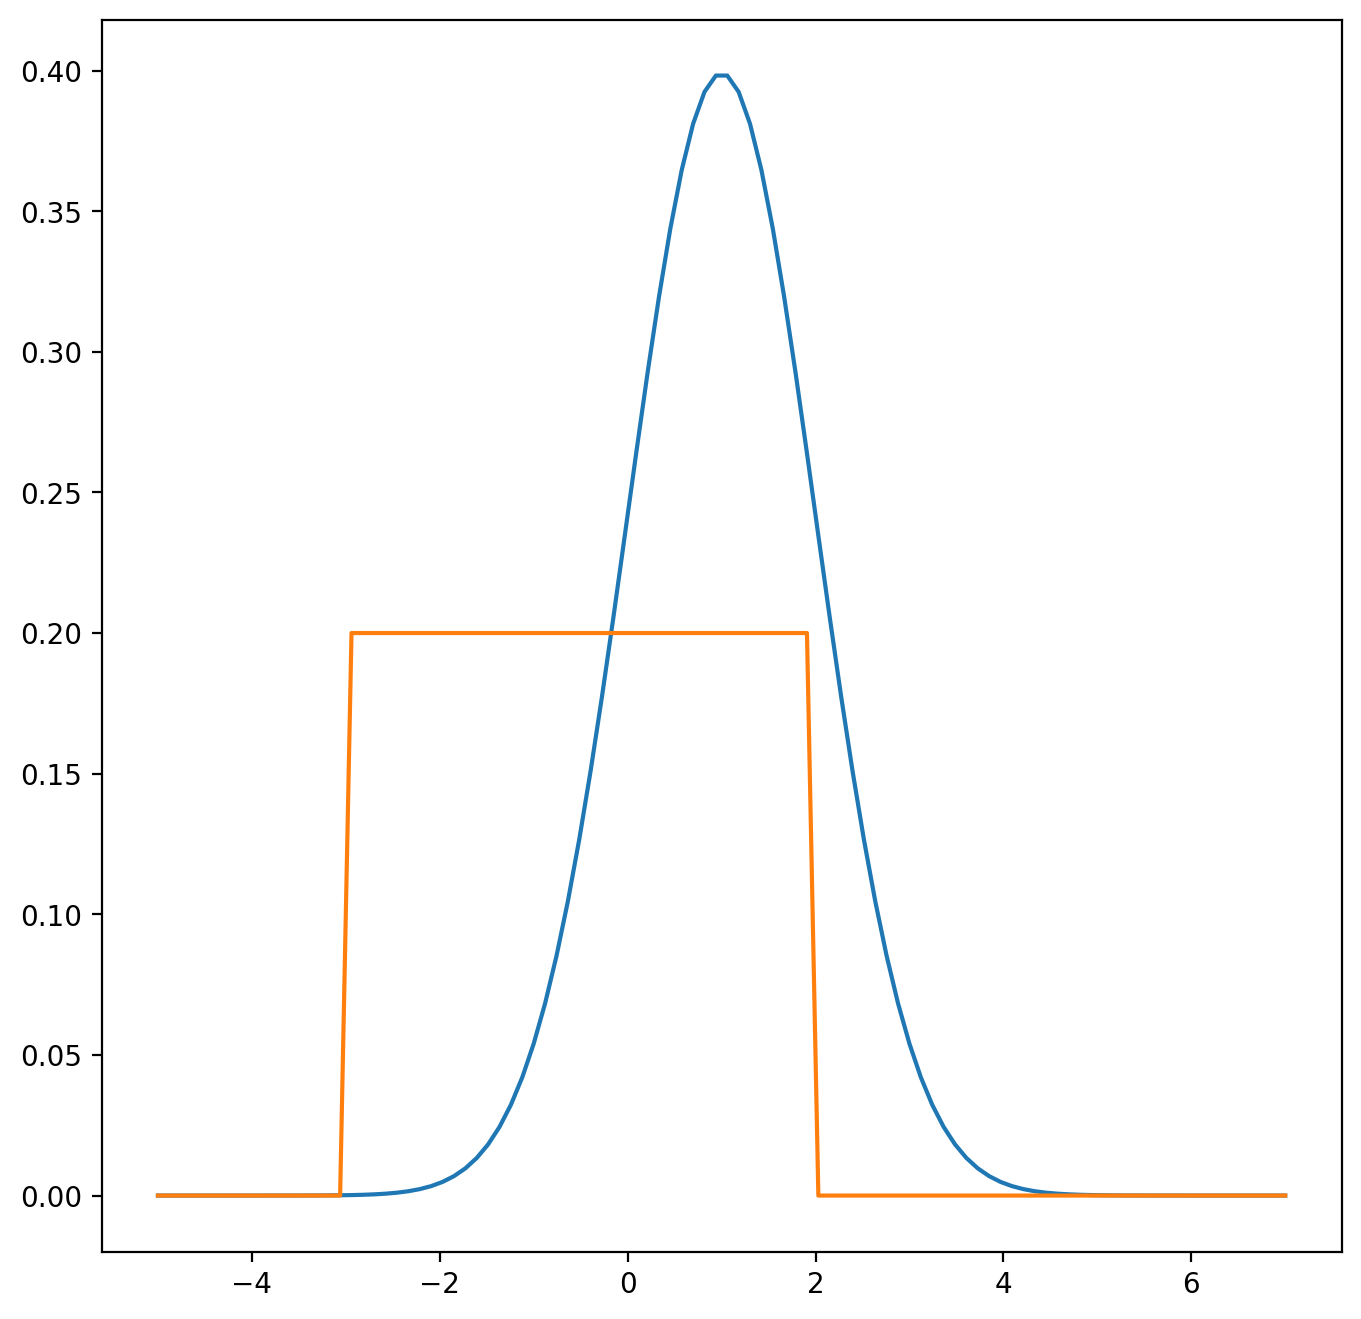

In [3]:
import scipy.stats 

gaussian=scipy.stats.norm(loc=1,scale=1)

uniform=scipy.stats.uniform(loc=-3,scale=5)

x = np.linspace(-5,7,100)
plt.plot(x,gaussian.pdf(x),label='Gaussian')
plt.plot(x,uniform.pdf(x),label='Gaussian')

## Bayes' Theorem <a class="anchor" id="three"></a>

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are ***not*** independent as, once you pick a $y$, your values of $x$ are constrained.

From [Ivezic et al](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)

We have that 
$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the ***marginal probability*** as
$$p(x) = \int p(x,y)dy,$$

where marginal means projecting on to one axis (integrating over the unwanted variable). The **marginal** distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the ***conditional probability*** (of $x$) for three $y$ values: $$p(x|y=y_0)$$  These are just normalized "slices" through the 2-D distribution.

The marginal probability of $x$ can be re-written as

$$p(x) = \int p(x|y)p(y) dy$$

But since $p(x|y)p(y) = p(y|x)p(x)$, we can write

> $$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' Theorem**, which itself is not at all controversial, though its application can be as we'll discuss later.

## Bayes' Theorem Example: Lego's <a class="anchor" id="four"></a>

An example with Lego's (it's awesome, let's have a look!):
[https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)

(This example comes from a very nice book: [Bayesian Statistics the Fun Way](https://www.amazon.com/Bayesian-Statistics-Fun-Will-Kurt/dp/1593279566/))

## Bayes' Theorem Example: Contingency Table  and COVID Tests

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's look at COVID tests.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true positive and true negative rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this $p(T|D)$ matrix is:
![http://www.astroml.org/_images/fig_contingency_table_1.png](http://www.astroml.org/_images/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D$ = 0.01. 

Now assume that a person tested positive. What is the probability that this person has the disease? Is it 98% 
because $\epsilon_{\rm FP}=0.02$?

We can't just read $p(D=1|T=1)$ off the table because the table entry is the conditional probability of the *test* given the *disease*, $p(T=1|D=1)$. What we want is the conditional probability of the *disease* given the *test*, that is, $p(D=1|T=1)$.

Bayes' Theorem then can be used to help us determine how likely it is that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

So
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

where in the final approximation we assume that all $\epsilon$ values are small. That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example, we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$).  

So we have
$$p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.333$$

Then in a sample of, e.g.,  1000 people, 10 people will *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive! 

Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease
(not 98%!). 

## Transformations of random variables

If $x$ is a random variable then $f(x)$ is also a random variable for any function $f$.

To transform probability distributions when taking functions of random variables, we can simply use conservation of dimensionless probability, i.e. 

$$\mathrm{Prob}(x, x+dx) = \mathrm{Prob}(y, y+dy)$$

$$p(x)dx = p(y)dy.$$ 

where $y = f(x)$.

Thus, $$p(y) = \left|\frac{dx}{dy}\right| p(x)$$

**EXAMPLE**

* Let $x$ be a random variable drawn from a uniform distribution between $0$ and $1$. So $p(x) = 1/(1-0) = 1$.  
* Let's transform to $y = e^x$.
* So $p(y) = \left|dy/dx\right|^{-1}p(x) = 1/y$

![https://www.astroml.org/_images/fig_transform_distribution_1.png](https://www.astroml.org/_images/fig_transform_distribution_1.png)

## Descriptive statistics 

Often we'll need to characherize a probability distribution. 

The distribution we're trying to characterize could be anything, e.g. (from my field) the distribution of masses of binary black-hole systems as discovered by gravitational-wave detectors. We really don't know the answer to this well, and the problem is made more complicated by things like detector selection effects (heavier systems are more likely to be observed), and blurring effects from measurement precision.

Let's take an example. Suppose we have taken some measurements:

In [4]:
# Based on Ivezic v2, Figure 6.8; edited by G. T. Richards, S. R. Taylor, and D. Gerosa

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
# In reality nature generates data for you


random_state = np.random.RandomState(seed=0)
N = 2000 # number of data points
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]

/Users/dgerosa/box/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [5]:
#x

[print(_) for _ in x]

8.952596638950636
6.942533358935216
11.857502968790328
7.9673676256550765
8.339793768997136
9.104030518710326
9.034882898224481
9.00066149734176
12.068202801788292
12.43803660691054
9.171912910373514
9.324573877535892
12.793456190615046
7.649754269389245
6.957712694613811
5.212342443874667
-0.5858969407576264
10.819198381549345
6.001707605068017
12.208739158947212
15.623442221914667
9.12180574588649
12.097206156705552
11.752914357372388
7.624716805403909
9.127190737797093
4.72461107622859
7.039304136974619
5.608240319346324
6.5331353251927435
6.595590247300794
14.350048371783956
6.734318572151493
7.01540998481395
9.000751889624222
5.691289191711737
12.940548902826198
8.951356409071611
4.261082360738824
7.074183889581066
7.773505002260368
7.599377398071211
7.578337462319974
6.661074122722392
7.032526365073723
3.7013711421608306
14.14247265328622
15.2022714128919
4.756113643850473
5.3798787765960085
6.710777342736699
7.121288020008638
8.257330210576704
6.195497572930919
5.715233380154599

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

We'll look at sampling next time, but hopefully you all know what an histogram is. The numbers we have are "samples" from a pdf and want to study its density.

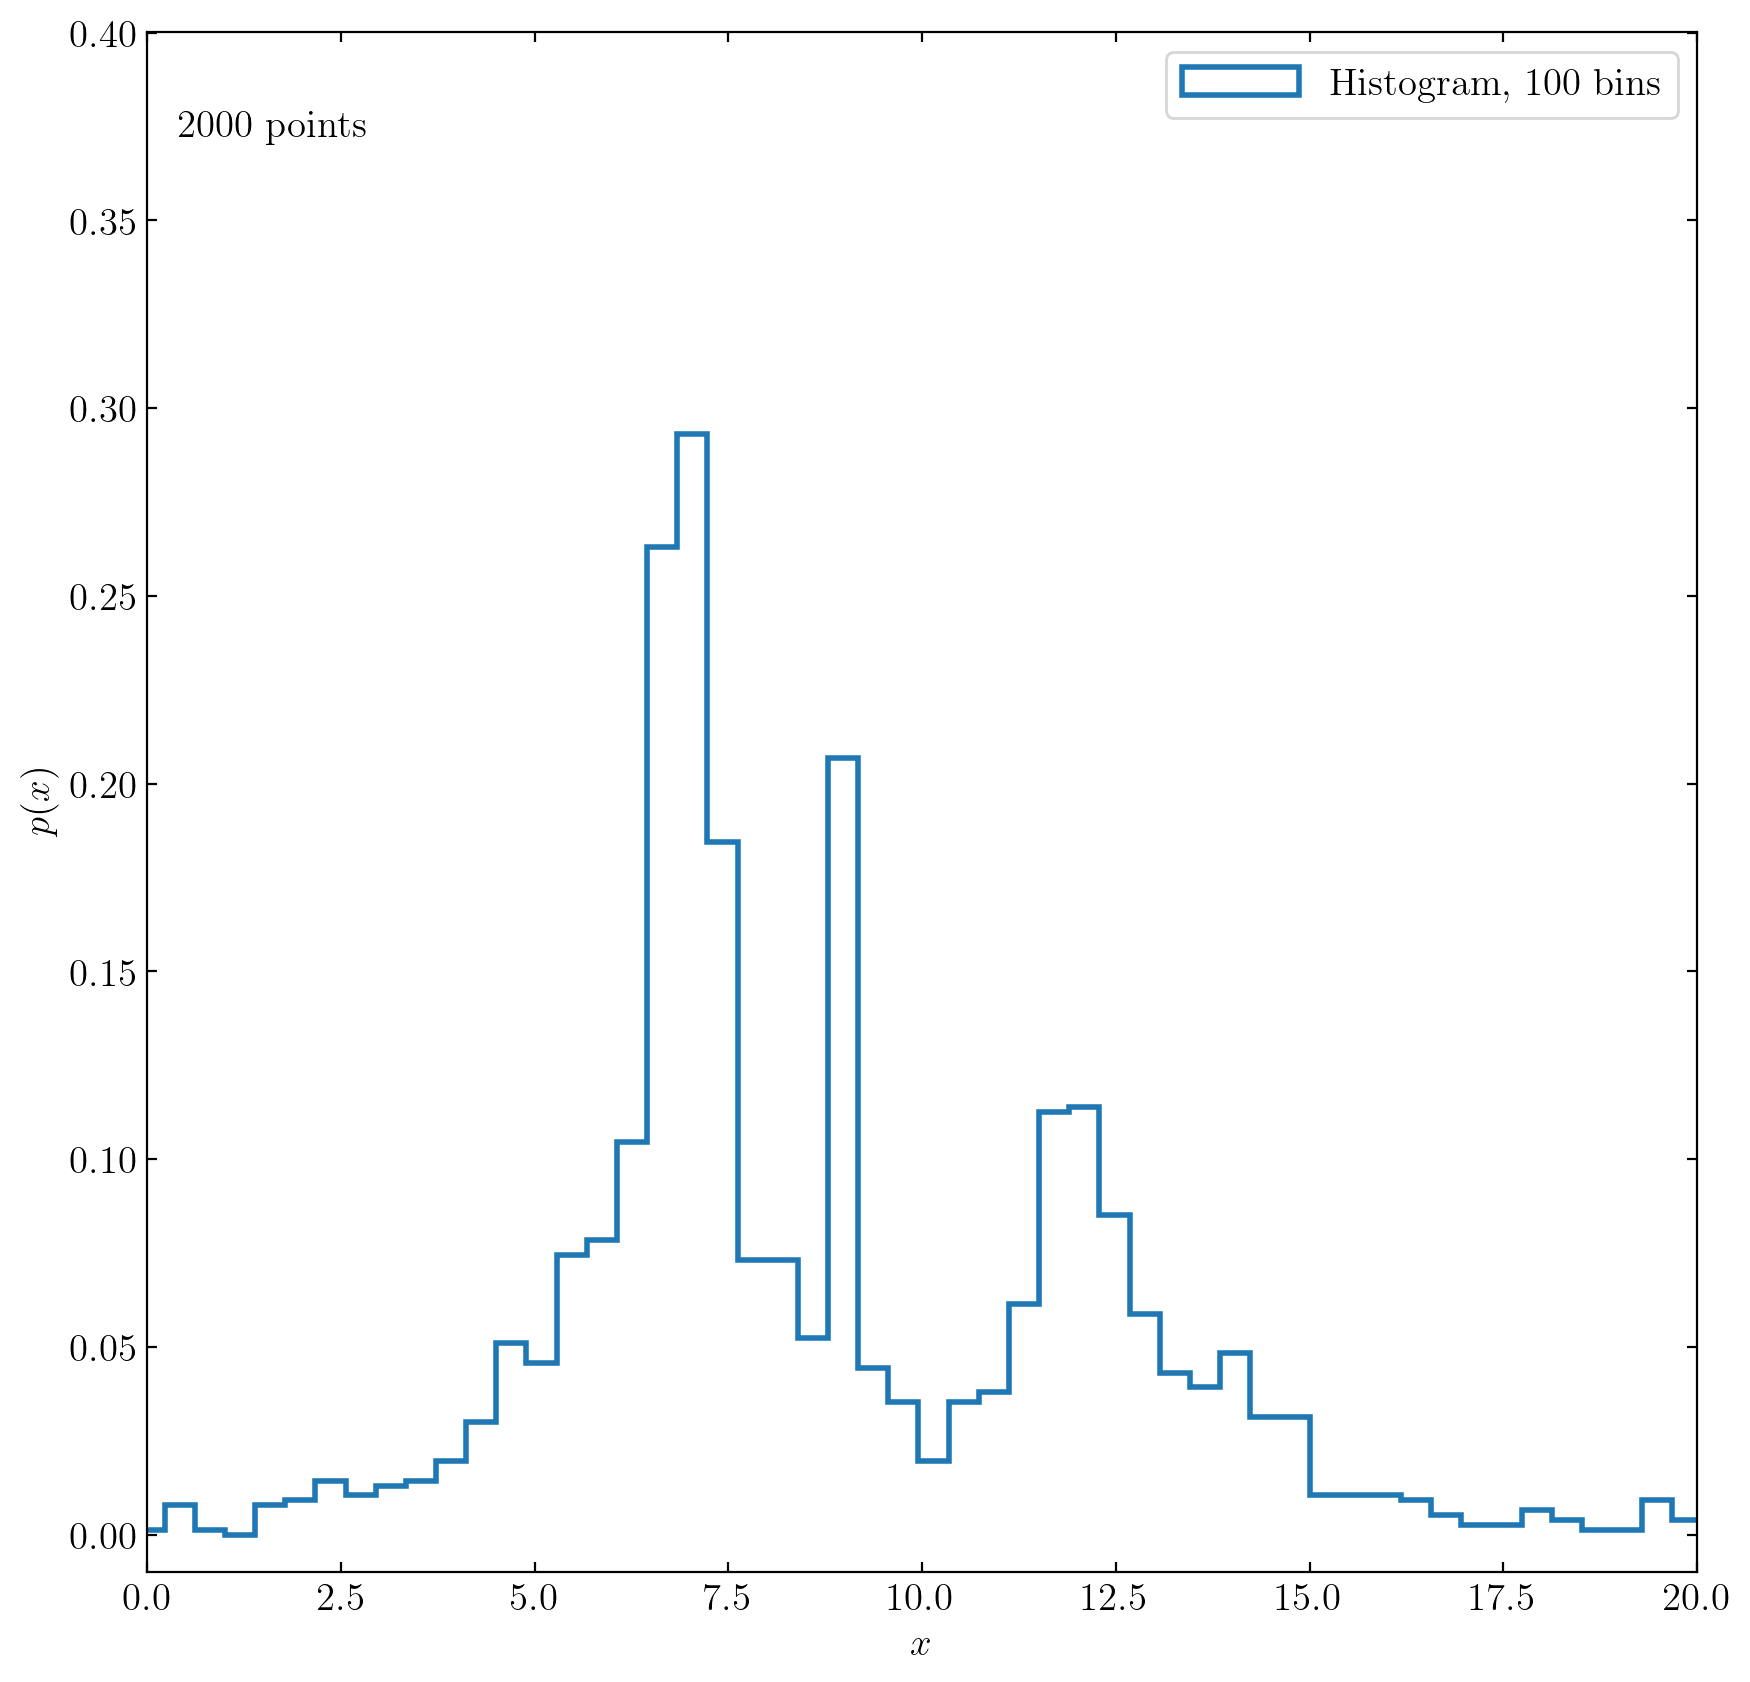

In [6]:

#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(figsize=(10, 10))
xgrid = np.linspace(-10, 30, 1000)

# True distribution: you typically don't have it! Only have the samples!
if False:
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")

# A simple histogram
# But try changing the number of bins!
if True:
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')

# Something more sophisticated: Kernel Density Estimation
# But try changing the bandwith! 
if False:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(x[:, None])
    dens_kde = np.exp(kde.score_samples(xgrid[:, None]))
    ax.plot(xgrid, dens_kde, '-', color='C1', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# Use Gaussian Mixtures with a pre-defined number of clusters (13)
if False:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
    logprob = gmm.score_samples(xgrid.reshape(-1, 1))
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))
    ax.plot(xgrid, fx(np.array(xgrid)), '-', color='C2',
            label="$f(x)$, parametric (13 Gaussians)")

# Plot cosmetics
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()

The full information is contained in these 2000 numbers, all of them. Often we want to come up with a smaller set of numbers that qualitatively describe our dataset

We all know that the **mean** of a sample is 

$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$ 

This is actually known as the **sample arithmetic mean**, and derives from *Monte Carlo integration* to get the first moment of the distribution, i.e. 

$$\mu = E(x) = \langle x \rangle = \int_{-\infty}^{\infty} x h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N x_i $$

where $\{x_i\}$ are random samples from the properly normalized $h(x)$, and $E(\cdot)$ means the **expectation value**.

Computing the mean is straightforward:

In [8]:
data =x.copy() #Why am I doing this?
mean = np.mean(data)
print(mean)

8.79491032639886


While it's most common to compute the mean, it may surprise you to learn that some distributions do not have formally calculable means (integration gives infinity). In these and other cases, the **median** is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by **outliers**.

To understand the previous statement, think about multiplying all numbers above the 50th percentile (i.e. the median) by 100, or even just replacing them with larger numbers. The mean would be strongly affected by these corrupted points, but **cumulative statistics based on the ordering of samples would remain unaffected by the outlier corruption**.

In [9]:
median = np.median(data)
median

7.752731764708434

In [10]:
# Try to unpack what is happening here
median = np.median(data)

mask = data > 15
data2 = data.copy()
data2[mask] = 10000

newmedian = np.median(data2)
newmean = np.mean(data2)

print(median, newmedian)
print(mean, newmean)

7.752731764708434 7.752731764708434
8.79491032639886 425.52602287925964


Other descriptive statistics are related to higher order moments of the distribution. Beyond the "average" *location* value, we'd like to know something about **deviations** from the average (which is related to the *shape* of the distribution).  The simplest thing to compute is $$d_i = x_i - \mu.$$  However, the average deviation is zero by definition of the mean. The next simplest thing to do is to square the differences $$\sigma^2 = \frac{1}{N}\sum(x_i-\mu)^2,$$ which we call the **variance**.

The *variance* $V$ is the just expectation value of $(x-\mu)^2$ (and related to the 2nd moment)

$$\sigma^2 = V = E((x-\mu)^2) = \int_{-\infty}^{\infty} (x-\mu)^2 h(x) dx,$$

where $\sigma$ is the **standard deviation**. Again, the integral gets replaced by a sum for discrete distributions. While most familiar for Gaussian distributions, you can compute the variance even if your distribution is not Gaussian.  

In [11]:
var = np.var(data)
std = np.std(data)
print(var, std)
print(np.isclose(std**2,var)) #Why am I not doing std**2==var?

15.026052739760294 3.876345281287555
True


**$P\%$ quantiles (or the $p^\mathrm{th}$ percentile, $q_p$)** are computed as
$$\frac{p}{100} = H(q_p) = \int_{-\infty}^{q_p}h(x) dx$$

The full integral from $-\infty$ to $\infty$ is 1 (100%).  So, here you are looking for the value of x that accounts for $p$ percent of the distribution.

For example, the 25th, 50th, and 75th percentiles:

In [12]:
q25, q50, q75 = np.percentile(data, [25, 50, 75])
print(q25, q50, q75)

6.674995612577169 7.752731764708434 11.637549888596837


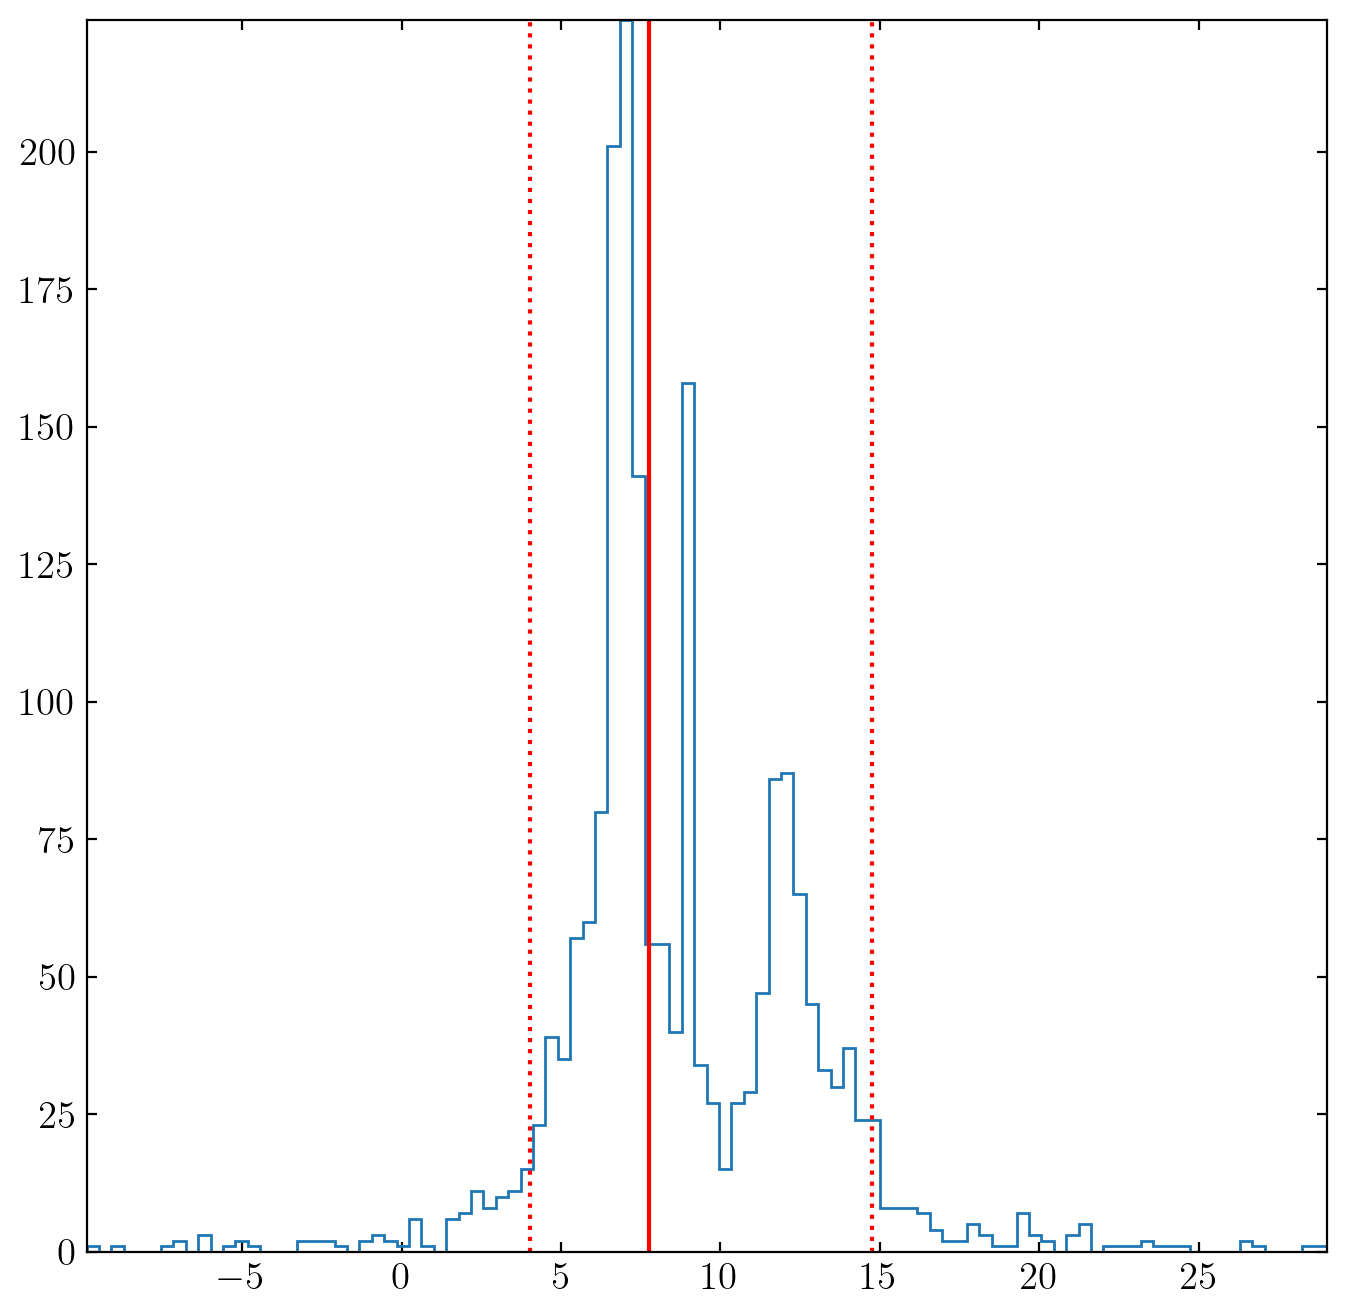

In [13]:
plt.hist(data,bins=100,histtype='step');

plt.axvline(np.percentile(data,50),c='red')
plt.axvline(np.percentile(data,5),c='red',ls='dotted')
plt.axvline(np.percentile(data,95),c='red',ls='dotted')

The region between the 5th and the 95th percentile contains 90% of the samples. In Bayesian statistics, this is the 90% credible interval.

## Sample versus Population statistics <a class="anchor" id="two"></a>

Statistics estimated from the *data* are called **sample statistics** as compared to **population statistics** derived from knowing the functional form of the pdf.

Specifically, $\mu$ is the **population mean**, i.e., it is the expectation value of $x$ for $h(x)$.  But we don't *know* $h(x)$.  So the **sample mean**, $\overline{x}$, is an ***estimator*** of $\mu$, defined as

$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$

which we determine from the data itself.

Instead of the **population variance** $\sigma^2$, we have the **sample variance**, $s^2$, where

$$s^2 = \frac{1}{N-1}\sum_{i=1}^N(x_i-\overline{x})^2$$

The $N-1$ denominator (instead of $N$) accounts for the fact that we determine $\overline{x}$ from the data itself instead of using a known $\mu$. This is called [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

Ideally one tries to work in a regime where $N$ is large enough that we can be lazy and ignore this. 

So the mean and variance of a distribution are $\mu$ and $\sigma^2$.  The *estimators* of the distribution are $\overline{x}$ (or $\hat{x}$) and $s^2$.

**Pill of modern astrophysics from my research.** We computed Bessel's correction in the context of Hierarchical Bayesian statistics in a recent paper. [Moore and Gerosa (2021), "Population-informed priors in gravitational-wave astronomy"](https://arxiv.org/abs/2108.02462). It's a fun paper to read if you're interested in some moderately heavy Bayesian stats.


### Uncertainty of sample statistics

We would also like to know the uncertainty of our estimates $\overline{x}$ and $s$. 

Note that $s$ is the width estimate of the underlying distribution; it is **NOT** the uncertainty of $\overline{x}$. This is a common misconception.

Rather the uncertainty of $\overline{x}$, $\sigma_{\overline{x}}$ is 

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$

which we call the **standard error of the mean**. The uncertainty of $s$ itself is

$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

In [14]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [8, 8]


## Central Limit Theorem <a class="anchor" id="one"></a>

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**:

> For an **arbitrary** distribution, $h(x)$, with a well-defined mean $\mu$ and standard deviation $\sigma$ the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathcal{N}(\mu,\sigma/\sqrt{N})$.

This theorem is the foudation behind the idea of repeating measurements in order to improve the accuracy of one's experiment. This is truly amazing! No matter what distribution you start off with or the measurement process itself, repeated batches of $N$ draws will follow a Gaussian centered around the mean.  

The **Weak Law of Large Numbers** (aka **Bernoulli's Theorem**) further says that the sample mean will converge to the distribution mean as $N$ increases.

Let's wrap our heads around what this means with some examples. 

We'll first consider $h(x) = \mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12})$. According to the Central Limit Theorem, taking the mean of many batches of $N$ random samples should result in a normal distribution with $\mathcal{N}(\mu=0.5,\sigma=1/\sqrt{12}/\sqrt{N})$.

Text(0, 0.5, 'pdf')

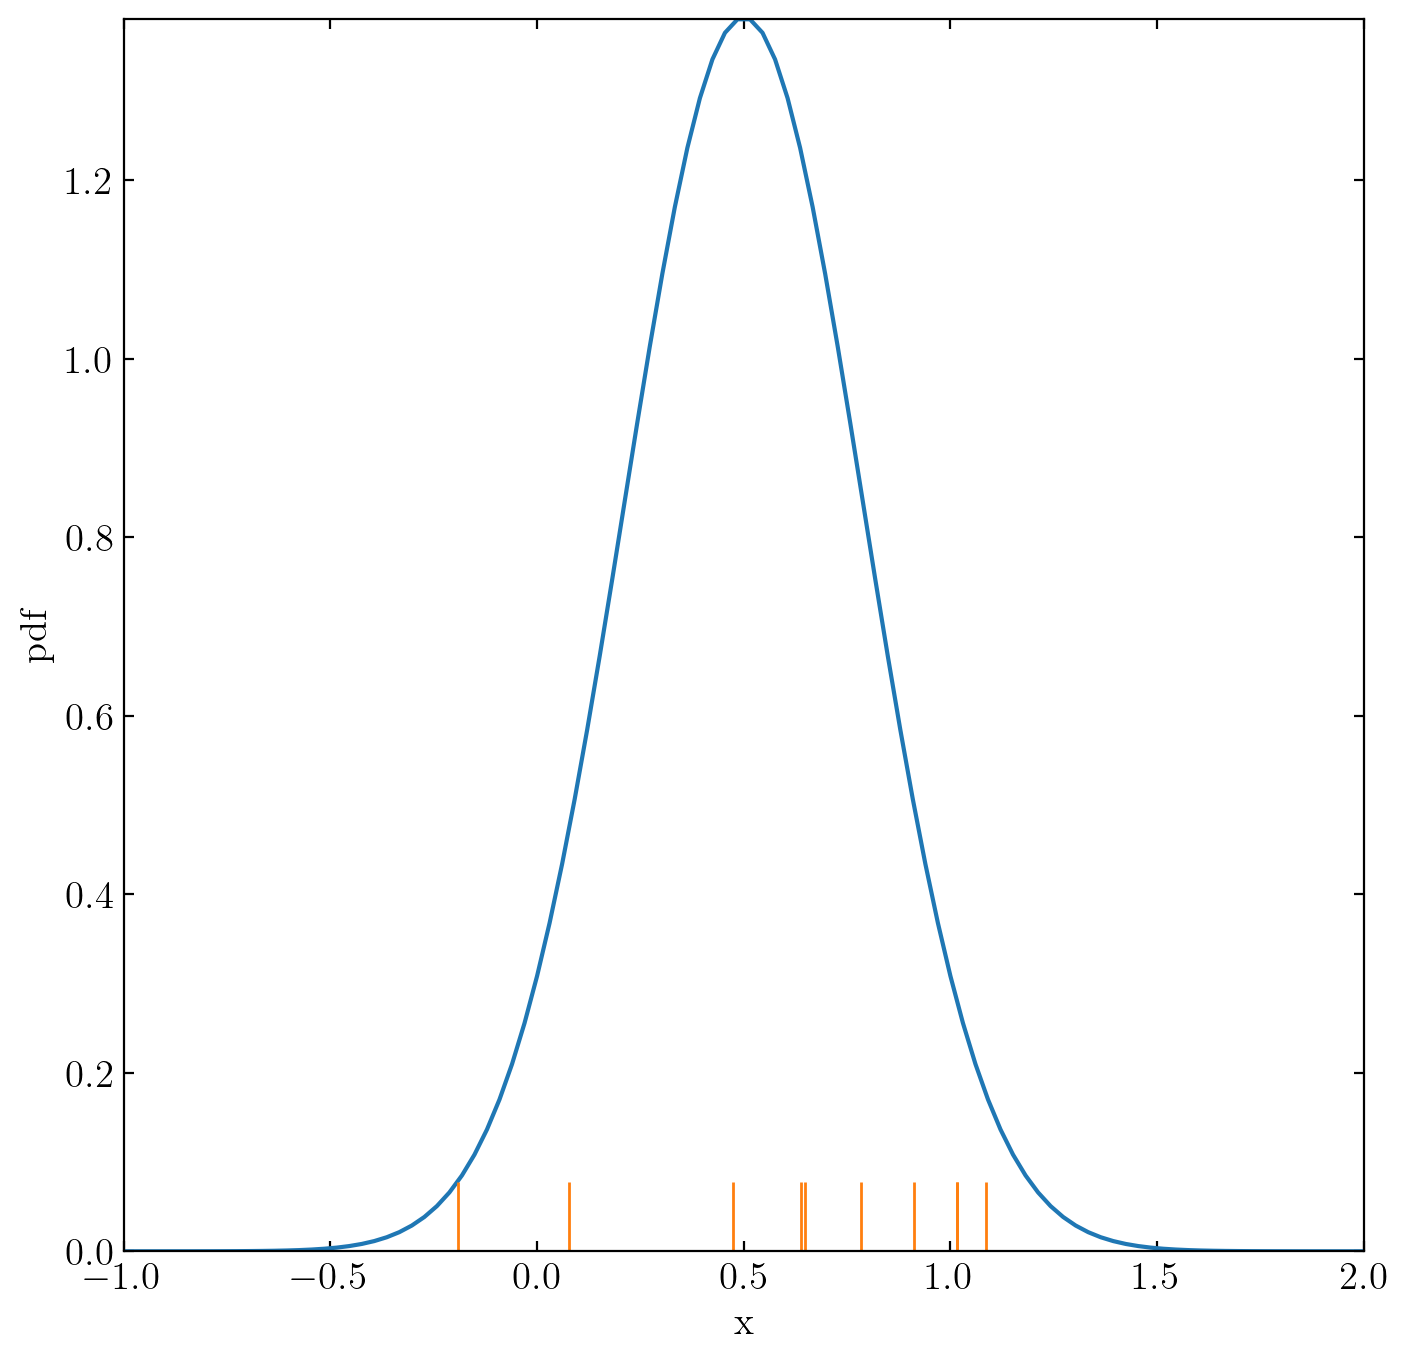

In [21]:
N = 10 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)

xgrid = np.linspace(-1,2,100)  
distG = scipy.stats.norm(loc=mu, scale=sigma_h)
plt.plot(xgrid, distG.pdf(xgrid))

x = np.random.normal(mu, sigma_h,10) # Two random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

Now let's average those two draws and plot the result (in the same panel). Do it as a histogram for 100,000 batches of 2 samples each. Use a stepfilled histogram that is normalized with 50% transparency and 100 bins.

  0%|          | 0/10000 [00:00<?, ?it/s]

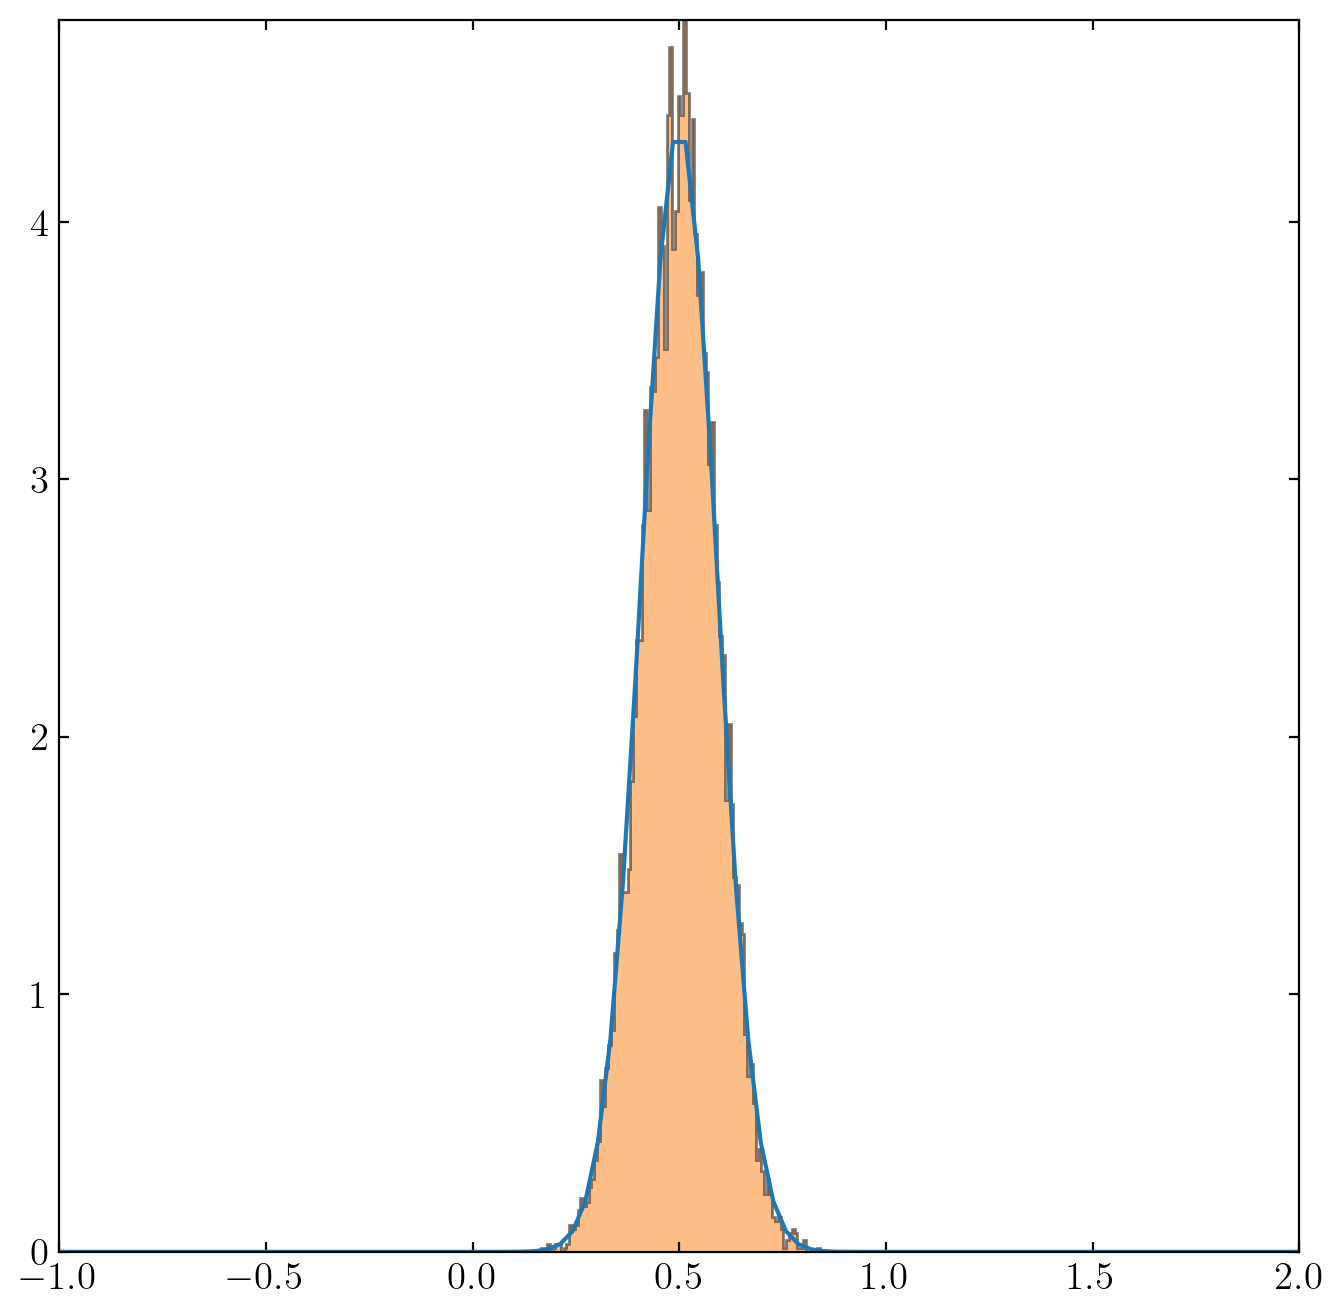

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 10 # Number of draws
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution

xgrid = np.linspace(-1,2,100)  

# plot the distribution of means according to central limit theorem
distG = scipy.stats.norm(mu, sigma_cl) # Complete
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in tqdm(np.arange(10000)):
    xx = np.random.normal(loc=mu, scale=sigma_h, size=N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True);

Well that's great and all, but didn't I say this worked for arbitrary generating distributions $h(x)$ so long as their mean and standard deviations were well defined? Let's check this out for a uniform distribution with $\mu=0.5$ and width$ =1$. 

  0%|          | 0/10000 [00:00<?, ?it/s]

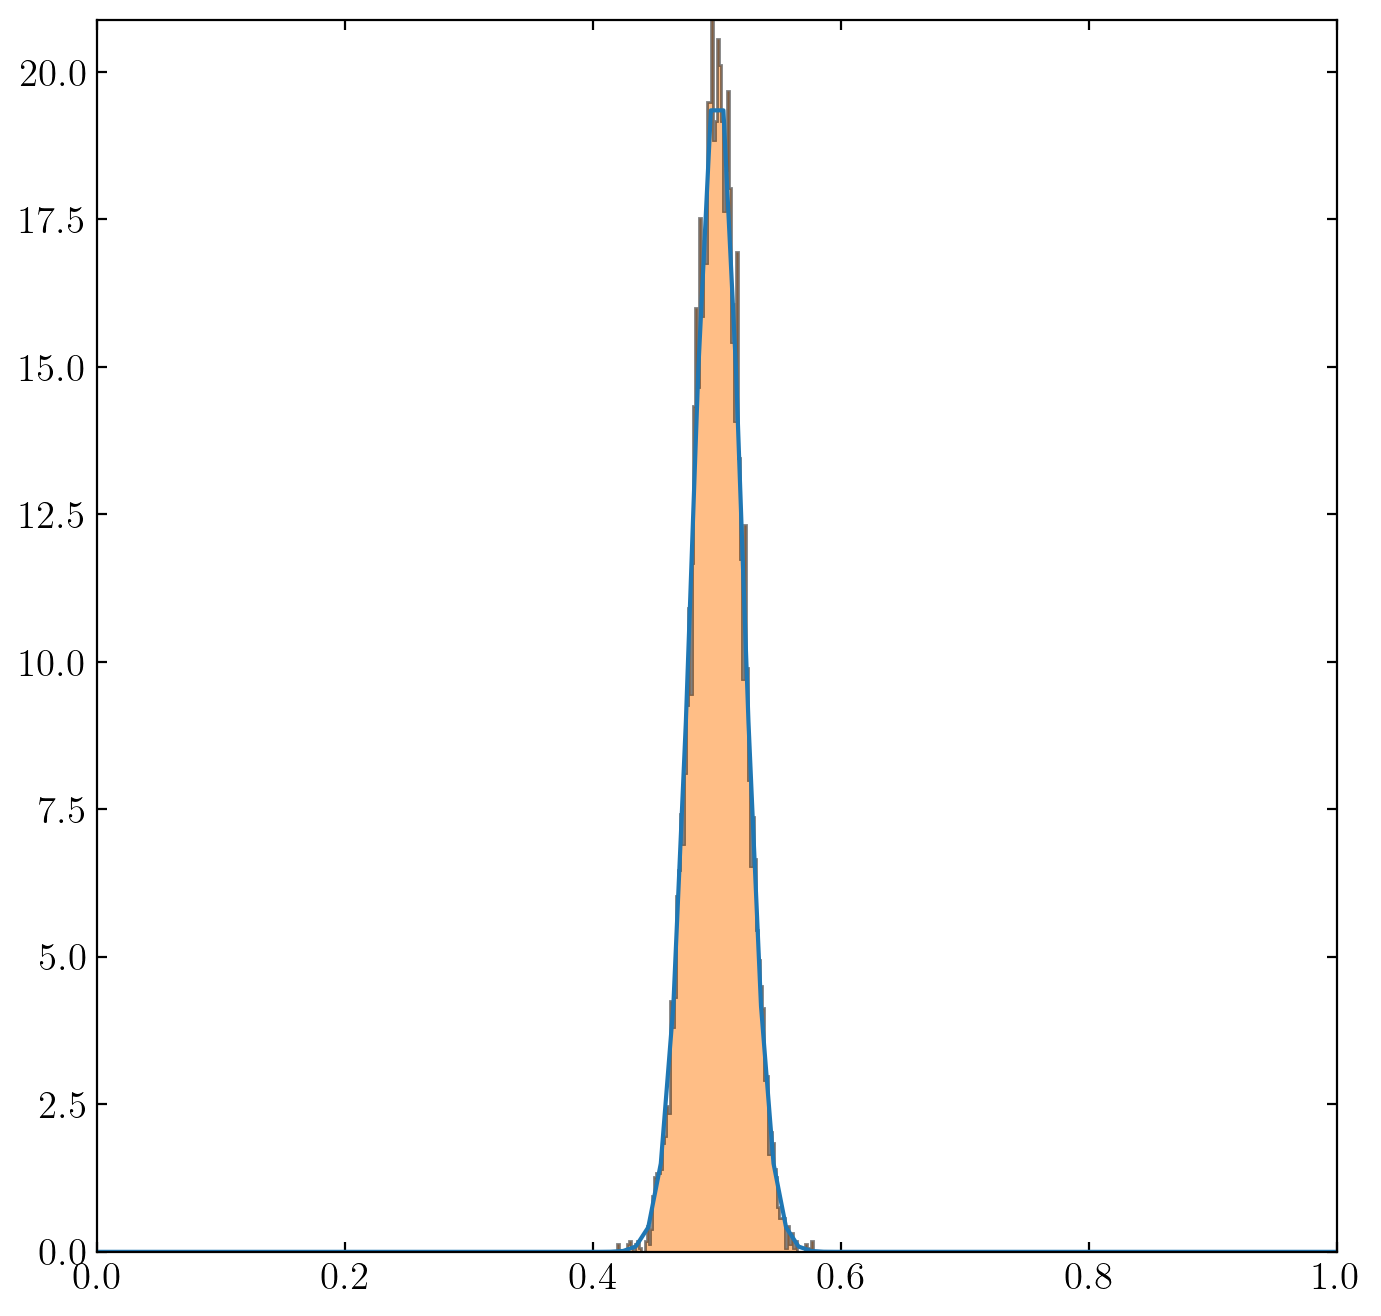

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N = 209# Number of draws

xmin=0
xmax=1
mu = 0.5 # Location
sigma_h = 1.0 / np.sqrt(12) # scale of h(x)
sigma_cl = sigma_h / np.sqrt(N) # scale of mean error distribution
xgrid = np.linspace(0,1,100)  

# plot the distribution of means according to central limit theorem
distG = scipy.stats.norm(mu, sigma_cl) # Complete
plt.plot(xgrid, distG.pdf(xgrid)) # Complete

# Add a histogram that is the mean of 100,000 batches of N draws
yy = []
for i in tqdm(np.arange(10000)):
    xx = np.random.uniform(0,1,N) # N random draws
    yy.append(np.average(xx)) # Append average of those random draws to the end of the array

plt.hist(yy, bins=100, histtype='stepfilled', alpha=0.5, density=True);


Now that's impressive! Now instead of averaging 2 draws, average 3.  Then do it for 10.  Then for 100.  Each time for 100,000 samples.


For 100 you will note that your draws are clearly sampling the full range, but the means of those draws are in a *much* more restrictred range. Moreover they are very closely following a Normal Distribution. 

This is truly mind blowing, and a wonderful example of the power and generalizability of statistics in tackling the measured properties of arbitrary distributions. Even if you've never heard of or understood the Central Limit Theorem, you have been implicitly using it your entire career so far. 


## Exam exercise!

## Bayes' Theorem Example: Monty Hall Problem <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already (or perhaps you saw this [in a movie](https://www.youtube.com/watch?v=CYyUuIXzGgI)?)... but don't think now! **Let's simulate it**. 


### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had N doors to choose from and the presenter opens M<N of them?